# **Project Name**    - Netflix movie and TV show Clustering

##### **Project Type**    - Unsupervised
##### **Contribution**    - Vyankat B Hambarde (Individual)

# **Project Summary -**

The objective of this undertaking is to examine the collection of movies and TV shows on Netflix until 2019, which originates from the third-party search engine Flixable. The primary aim is to categorize the content into meaningful clusters utilizing techniques from Natural Language Processing (NLP). This process aims to enhance the user experience by implementing an effective recommendation system. The ultimate goal is to mitigate subscriber attrition for Netflix, a platform boasting more than 220 million subscribers.

Furthermore, a thorough analysis of the dataset will be conducted to unveil noteworthy patterns and developments within the streaming entertainment sector.

# **GitHub Link -**

https://github.com/vyankath/Capstone_UL_NMTC

# **Problem Statement**


The dataset encompasses a compilation of TV shows and movies accessible on Netflix up to the year 2019. The dataset's origins trace back to Flixable, a third-party search engine dedicated to Netflix content. In 2018, an intriguing report by Flixable unveiled a remarkable trend: the count of TV shows on Netflix had expanded nearly threefold since 2010. In contrast, the assortment of movies had diminished by over 2,000 titles since 2010, whereas TV show offerings had undergone a nearly threefold increase. Exploring this dataset further promises the discovery of additional illuminating insights.

Enriching this dataset through integration with external data sources such as IMDB ratings and Rotten Tomatoes could yield a trove of captivating revelations.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [354]:
# Import Libraries

import numpy as np
import pandas as pd
import datetime as dt                                               ## Data Maipulation Libraries  

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
%matplotlib inline
import plotly.graph_objects as go                                   ## Data Visualisation Libraray        

import string
string.punctuation
import nltk
nltk.download('punkt')
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler                    # libraries used to process textual data         

from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram                      # libraries used to implement clusters        

import warnings;warnings.filterwarnings('ignore')
import warnings;warnings.simplefilter('ignore')                     # Library of warnings would assist in ignoring warnings issued             

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Dataset Loading

In [355]:
# Load Dataset
# Mounting drive
#from google.colab import drive
#drive.mount('/content/drive')

In [356]:
# Load Dataset
#df= pd.read_csv("/content/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

In [357]:
# Load Dataset
df= pd.read_csv("NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

### Dataset First View

In [358]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [359]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### Dataset Rows & Columns count

In [360]:
# Dataset Rows & Columns count
print(f"In a dataset {df.shape[0]} Rows and {df.shape[1]} Column are there")

In a dataset 7787 Rows and 12 Column are there


### Dataset Information

In [361]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [362]:
# Dataset Duplicate Value Count
print(f"Duplicated observations in the dataset: {df.duplicated().sum()}")

Duplicated observations in the dataset: 0


#### Missing Values/Null Values

In [363]:
# Missing Values/Null Values Count
print(f"Null values in dataset are\n{df.isna().sum()} and in percentage\n{(df.isnull().sum()/len(df))*100}")

Null values in dataset are
show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64 and in percentage
show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64


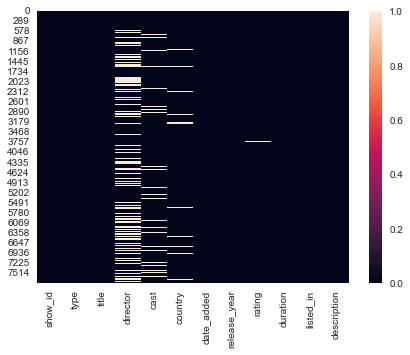

In [364]:
# Visualizing the missing values
plt.figure(figsize=(7,5))
sns.heatmap(df.isnull(), cbar=True)
plt.show()

### What did you know about your dataset?

The dataset titled "Netflix Movies and TV Shows Clustering" comprises a total of 12 columns, among which only a single column possesses an integer data type. Although the dataset doesn't exhibit any duplicate entries, it does contain null values within five columns, namely director, cast, country, date_added, and rating.

This dataset presents a valuable opportunity to delve into the evolving patterns encompassing the assortment of movies and TV shows accessible on Netflix. Furthermore, it serves as a resourceful foundation for constructing clustering models designed to group similar titles together based on shared attributes like genre, country of origin, and rating.

## ***2. Understanding Your Variables***

In [365]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [366]:
# Dataset Describe
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description

The variable description of the Netflix Movies and TV Shows Clustering Dataset is as follows:

- show_id : Unique ID for every Movie / Tv Show

- type : Identifier-A Movie or TV Show

- title : Title of the movie/show

- director : Director of the show

- cast : Actors involved

- Country : Country of production

- date_added : Date it was added on Netflix

- release year : Actual release year of the show

- rating : TV rating of the show

- duration : Total duration in minutes or number of seasons

- listed in : Genre

- Description : The summary description

### Check Unique Values for each variable.

In [367]:
# Check Unique Values for each variable.
for col in df.columns:
  print(f"Unique values in {col} are {df[col].nunique()}")

Unique values in show_id are 7787
Unique values in type are 2
Unique values in title are 7787
Unique values in director are 4049
Unique values in cast are 6831
Unique values in country are 681
Unique values in date_added are 1565
Unique values in release_year are 73
Unique values in rating are 14
Unique values in duration are 216
Unique values in listed_in are 492
Unique values in description are 7769


## 3. ***Data Wrangling***

### Data Wrangling Code

### 1. Handling Null values from each feature

director,cast,country,date_added,rating these are the columns with misssing values let's check the value counts of these columns.     

In [368]:
# Write your code to make your dataset analysis ready.
miss_col = ['director','cast','country','date_added','rating']
for col in miss_col:
    print(f"Value counts of column {col} are\n{df[col].value_counts()}") # not getting clarity lets see one by one 

Value counts of column director are
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
                          ..
Vibhu Virender Puri        1
Lucien Jean-Baptiste       1
Jason Krawczyk             1
Quinn Lasher               1
Sam Dunn                   1
Name: director, Length: 4049, dtype: int64
Value counts of column cast are
David Attenborough                                                                                                                                                            18
Samuel West                                                                                                                                                                   10
Jeff Dunham                                                                                                                                                                    7
Kevin Hart                             

In [369]:
df['director'].value_counts()

Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
                          ..
Vibhu Virender Puri        1
Lucien Jean-Baptiste       1
Jason Krawczyk             1
Quinn Lasher               1
Sam Dunn                   1
Name: director, Length: 4049, dtype: int64

In [370]:
df['cast'].value_counts()

David Attenborough                                                                                                                                                            18
Samuel West                                                                                                                                                                   10
Jeff Dunham                                                                                                                                                                    7
Kevin Hart                                                                                                                                                                     6
Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Doran, Julie Lemieux, Derek McGrath                                                         6
                                                                                                                   

In [371]:
df['country'].value_counts()

United States                                                   2555
India                                                            923
United Kingdom                                                   397
Japan                                                            226
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 681, dtype: int64

In [372]:
df['date_added'].value_counts()

January 1, 2020      118
November 1, 2019      94
December 31, 2019     76
March 1, 2018         76
October 1, 2018       72
                    ... 
October 12, 2014       1
March 22, 2020         1
March 31, 2013         1
December 12, 2019      1
January 11, 2020       1
Name: date_added, Length: 1565, dtype: int64

In [373]:
df['rating'].value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

- As the 'date_added' and 'rating' columns contain a negligible proportion of null values, it's advisable to drop those instances to maintain the clustering model's fairness and integrity.
- Due to the significantly higher occurrence of null values in the 'director' and 'cast' columns and the absence of actual data for these entries, a more appropriate solution is to replace these missing values with 'unknown'.
- Addressing the 'country' column, where only 6% of null values are present, the pragmatic approach involves imputing these null entries with the mode value, considering the predominant representation of movies/shows from the United States.

In [374]:
df[['director','cast']]=df[['director','cast']].fillna("unknown")    # filling unknown in null values of director and cast column

df['country']=df['country'].fillna(df['country'].mode()[0])          # filling null values of country with Mode

df.dropna(axis=0, inplace=True)                                      # Dropping other null values of columns

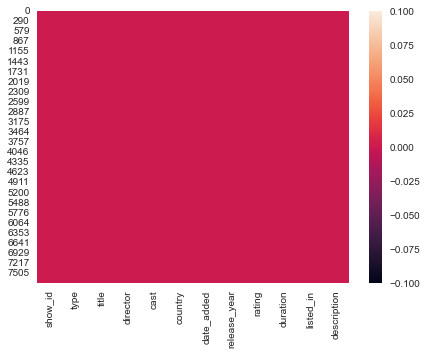

In [375]:
plt.figure(figsize=(7,5))
sns.heatmap(df.isnull(), cbar=True)
plt.show()                                   # Handelled null values.

### 2. Dealing with nested columns i.e 'director', 'cast', 'listed_in' and 'country

In [376]:
df['director'].head(15)

0                  unknown
1        Jorge Michel Grau
2             Gilbert Chan
3              Shane Acker
4           Robert Luketic
5              Serdar Akar
6          Yasir Al Yasiri
7           Kevin Reynolds
8            Shravan Kumar
9             Vikram Bhatt
10            Zak Hilditch
11                 unknown
12    Diego Enrique Osorno
13     Nottapon Boonprakob
14              John Suits
Name: director, dtype: object

In [377]:
dirs_list = df['director'].apply(lambda x: str(x).split(', ')).tolist() # will give list of directors
 
df_dir = pd.DataFrame(dirs_list, index = df['title'])                   # Creating dir df with title as a index

df_dir = df_dir.stack()                                                 # stacking the df

df_dir = pd.DataFrame(df_dir.reset_index())                             # resetting the index

df_dir.rename(columns={0:'Directors'},inplace=True)                     # after reseting the column will be named as 0 so renaming to director

df_dir = df_dir.drop(['level_1'],axis=1)                                # deleting the level_1 col from df
df_dir.sample(10)

,title,Directors
6715,The Burial of Kojo,"Sam ""Blitz"" Bazawule"
5130,Panoptic,Rana Eid
1797,Death of Me,Darren Lynn Bousman
1539,Club Friday The Series 6,unknown
5431,Qué pena tu serie,unknown
397,Alan Saldaña: Mi vida de pobre,Jan Suter
3548,Kahlil Gibran's The Prophet,Bill Plympton
3027,Homemade,unknown
3861,Lego Friends,unknown
2820,Happy And,unknown


In [378]:
def transform_column_to_dataframe(df, column_name, new_column_name):  # this user defined function used to above task for diffrent columns
    values = df[column_name].apply(lambda x: str(x).split(', ')).tolist()
    new_df = pd.DataFrame(values, index=df['title'])
    new_df = new_df.stack()
    new_df = pd.DataFrame(new_df.reset_index())
    new_df.rename(columns={0: new_column_name}, inplace=True)
    new_df = new_df.drop(['level_1'], axis=1)
    return new_df

In [379]:
df_actor = transform_column_to_dataframe(df, 'cast', 'Actors')
df_actor.sample(10)# Display a sample of the transformed DataFrame

,title,Actors
47703,The Lobster,Rachel Weisz
32758,Officer Downe,Corey Taylor
4866,Baahubali 2: The Conclusion (Malayalam Version),Nassar
19536,Heartbreak High,Stephen O'Rourke
9701,Cheer,unknown
55747,WWII in HD,Steve Zahn
45516,The Epic Tales of Captain Underpants,Ramone Hamilton
33474,Organize Isler,Cem Yılmaz
33818,Pad Man,Radhika Apte
1467,A Haunting at Silver Falls: The Return,Clemmie Dugdale


In [380]:
df_Genre = transform_column_to_dataframe(df, 'listed_in', 'Genre')
df_Genre.sample(10)# Display a sample of the transformed DataFrame

,title,Genre
10600,Peter Rabbit,Comedies
15182,The Tree of Blood,International Movies
1363,Austin Powers in Goldmember,Action & Adventure
9421,My Beautiful Broken Brain,Documentaries
4544,Extinction,Sci-Fi & Fantasy
6363,I Hear You,International TV Shows
9471,My Hotter Half,Reality TV
10001,Oddbods,TV Comedies
8834,Men in Black,Comedies
14946,The Rolling Stones: Olé Olé Olé! A Trip Across...,Documentaries


In [381]:
df_Country = transform_column_to_dataframe(df, 'country', 'Country')
df_Country.sample(10)# Display a sample of the transformed DataFrame

,title,Country
7322,The Alcàsser Murders,Spain
4631,Mad Money,United States
5219,My Next Guest Needs No Introduction With David...,United States
1599,Chernobyl Diaries,United States
9059,Veerappan,India
1201,Blood Will Tell,Argentina
371,Adore,Australia
1148,Black Crows,Kuwait
1321,Braxton Family Values,United States
6498,Sarvopari Palakkaran,India


In [382]:
## Merging all the Above dataframes
df_d_a = df_dir.merge(df_actor,on=['title'],how='inner') # Merging director and cast

df_d_a_g = df_d_a.merge(df_Genre,on=['title'],how='inner') # Merging listed_in (Genre) with merged of (director and cast)

df_combined = df_d_a_g.merge(df_Country,on=['title'],how='inner') # Merging country with merged of [listed_in with merged of (director and cast)]

df_combined.head()                                    # Head of final merged dataframe

,title,Directors,Actors,Genre,Country
0,3%,unknown,João Miguel,International TV Shows,Brazil
1,3%,unknown,João Miguel,TV Dramas,Brazil
2,3%,unknown,João Miguel,TV Sci-Fi & Fantasy,Brazil
3,3%,unknown,Bianca Comparato,International TV Shows,Brazil
4,3%,unknown,Bianca Comparato,TV Dramas,Brazil


In [383]:
# Merging combined df with the orignal dataframe in order to make the final dataframe
df = df_combined.merge(df[['type', 'title', 'date_added', 'release_year', 'rating', 'duration','description']],on=['title'],how='left')
df.head()

,title,Directors,Actors,Genre,Country,type,date_added,release_year,rating,duration,description
0,3%,unknown,João Miguel,International TV Shows,Brazil,TV Show,"August 14, 2020",2020,TV-MA,4 Seasons,In a future where the elite inhabit an island ...
1,3%,unknown,João Miguel,TV Dramas,Brazil,TV Show,"August 14, 2020",2020,TV-MA,4 Seasons,In a future where the elite inhabit an island ...
2,3%,unknown,João Miguel,TV Sci-Fi & Fantasy,Brazil,TV Show,"August 14, 2020",2020,TV-MA,4 Seasons,In a future where the elite inhabit an island ...
3,3%,unknown,Bianca Comparato,International TV Shows,Brazil,TV Show,"August 14, 2020",2020,TV-MA,4 Seasons,In a future where the elite inhabit an island ...
4,3%,unknown,Bianca Comparato,TV Dramas,Brazil,TV Show,"August 14, 2020",2020,TV-MA,4 Seasons,In a future where the elite inhabit an island ...


Now lets deal with date column i.e. date_added.

In [384]:
df['date_added']= pd.to_datetime(df['date_added'])                  # converting date_added to datetime datatype as it is in object

df["day_added"]= df["date_added"].dt.day                            # Extracting date
df["month_added"]= df["date_added"].dt.month                        # Extracting month        
df["year_added"]= df["date_added"].dt.year                          # Extracting year

df.drop('date_added', axis=1, inplace=True)                         # Dropping orignal column date_added            

In [385]:
df[['duration_minutes', 'duration_seasons']] = df['duration'].str.extract(r'(\d+) min|(\d+) Seasons')

In [386]:
df['duration_minutes'] = df['duration_minutes'].astype('float')

In [387]:
print(df.duration_minutes.isna().mean()*100)
print(df.duration_seasons.isna().mean()*100)

28.285563145949823
89.33262043035829


Above percentage of missing values indicate that season based content is min so we can drop that and min can be filled using mean.

In [389]:
import math
df['duration_minutes'].fillna(math.floor(df['duration_minutes'].mean()), inplace=True) # filling na as int 106 mean

In [390]:
df['duration_seasons'].dropna(inplace=True)

Now looking at type column there are two diffrent values are there Movie and TV Show we can convert them movie as 1 and TV Show as 0.


In [391]:
df.type.value_counts().to_dict()

{'Movie': 126079, 'TV Show': 49728}

In [392]:
df['is_movie'] = df['type'].replace({'Movie': 1, 'TV Show': 0})     # Converting movie as 1 and TV Show as 0
df.drop('type', axis=1, inplace=True)  

In [393]:
df.rating.value_counts()

TV-MA       64510
TV-14       39087
R           21608
TV-PG       13649
PG-13       13304
PG           9073
TV-Y7        5357
TV-Y         3183
TV-G         2512
NR           1666
G            1429
UR            194
NC-17         149
TV-Y7-FV       86
Name: rating, dtype: int64

The "rating" column in the Netflix dataset typically contains content ratings that provide guidance on the appropriate audience for each movie or TV show.

- G: General Audiences - All ages are admitted. No content is deemed unsuitable.
- PG: Parental Guidance Suggested - Some material may not be suitable for children.
- PG-13: Parents Strongly Cautioned - Some material may be inappropriate for children under 13.
- R: Restricted - Restricted to viewers over 17 or 18. Contains mature content.
- NC-17: Adults Only - No one 17 and under admitted. Contains explicit adult content.

- TV-Y: Suitable for all children.
- TV-Y7: Directed to older children.
- TV-Y7-FV: This rating is used for children's TV shows that may not be suitable for children under 7. It may contain fantasy violence.
- TV-G: General audiences.
- TV-PG: Parental guidance suggested.
- TV-14: Parents strongly cautioned. May be unsuitable for children under 14.
- TV-MA: Mature audiences. Intended for adults.
- UR: This stands for "Unrated." It means that the content has not been rated by a rating board, and it may contain material that is not suitable for all audiences.
- NR: This stands for "Not Rated." It means that the content has not been rated by a rating board, and it may contain material that is not suitable for all audiences.

So we could group ratings into broader categories like "Family-Friendly," "Teen," "Adult," etc for this we can adopt the binning method i.e. categorizing ratings into diffrent groups.

In [394]:
rating_to_category = {'TV-MA':'Adult Content','R':'Adult Content','PG-13':'Teen Content','TV-14':'Teen Content','TV-PG':'Children Content',
                      'NR':'Not Rated','TV-G':'Children Content','TV-Y':'Family-friendly Content','TV-Y7':'Family-friendly Content',
                      'PG':'Children Content','G':'Children Content','NC-17':'Adult Content','TV-Y7-FV':'Family-friendly Content','UR':'Not Rated'}

df['rating'] = df['rating'].map(rating_to_category)
df['rating'].unique()

array(['Adult Content', 'Teen Content', 'Children Content', 'Not Rated',
       'Family-friendly Content'], dtype=object)

In [395]:
df.tail(7)

,title,Directors,Actors,Genre,Country,release_year,rating,duration,description,day_added,month_added,year_added,duration_minutes,duration_seasons,is_movie
175800,Zumbo's Just Desserts,unknown,Rachel Khoo,Reality TV,Australia,2019,Children Content,1 Season,Dessert wizard Adriano Zumbo looks for the nex...,31,10,2020,106.0,NaN,0
175801,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,unknown,Documentaries,United Kingdom,2019,Adult Content,90 min,This documentary delves into the mystique behi...,1,3,2020,90.0,NaN,1
175802,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,unknown,Documentaries,Canada,2019,Adult Content,90 min,This documentary delves into the mystique behi...,1,3,2020,90.0,NaN,1
175803,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,unknown,Documentaries,United States,2019,Adult Content,90 min,This documentary delves into the mystique behi...,1,3,2020,90.0,NaN,1
175804,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,unknown,Music & Musicals,United Kingdom,2019,Adult Content,90 min,This documentary delves into the mystique behi...,1,3,2020,90.0,NaN,1
175805,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,unknown,Music & Musicals,Canada,2019,Adult Content,90 min,This documentary delves into the mystique behi...,1,3,2020,90.0,NaN,1
175806,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,unknown,Music & Musicals,United States,2019,Adult Content,90 min,This documentary delves into the mystique behi...,1,3,2020,90.0,NaN,1


### What all manipulations have you done and insights you found?

Follwing are the some manupulations i have done.

1. **Handling Missing Values:**
   - To fill missing data in the 'director' and 'cast' columns, the solution involved replacing these gaps with 'Unknown'.
   - To fill missing 'country' values, the most frequent value (Mode) was used as a replacement.
   - Rows with missing values in the 'date_added' and 'rating' columns, which had a minimal percentage of missing data, were removed.

2. **Unnesting Data:**
   - Values were extracted from columns like 'director', 'cast', 'listed_in', and 'country'.
   - These values were then spread across separate dataframes, each corresponding to a specific column.
   - Combining these dataframes back into the original one using a 'left join' helped isolate individual values in each feature.

3. **Data Type Adjustments:**
   - The 'duration' column was modified to display only the integer part, eliminating labels like 'min' and 'seasons'.
   - The 'date_added' column was transformed into a proper date format.
   - Additional features such as 'date', 'month', and 'year' were derived from the 'date_added' column.

4. **Rating Categorization:**
   - The observation was made that the 'rating' column consisted of coded categories.
   - These codes were grouped into 5 bins based on content, namely Adult, Restricted, Teen, All Ages, and Not Rated.

5. **Replacing:**
   - The type column has the two unique values as Movie and TV show that are replaced by 1 and 0 respectively.

These steps were taken to prepare the data for analysis, making it more comprehensible and enabling insights into the content of movies and TV shows on Netflix.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### 1.Univariate Analysis: Inspecting each variable individually to understand its distribution and potential outliers. This will provide insights into the characteristics of each variable and help identify any extreme values or anomalies.

#### Chart - 1 Checking the Type (i.e. Movie and TV Show)

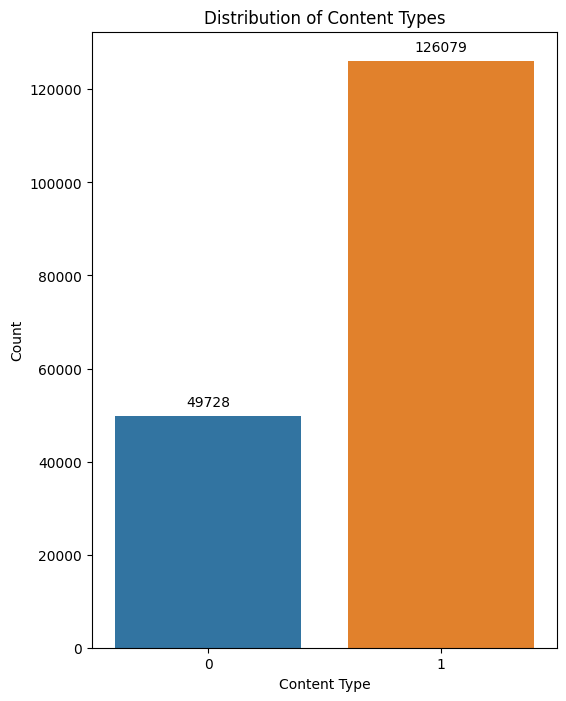

In [517]:
# Chart - 1 visualization code
plt.figure(figsize=(6, 8))
p=sns.countplot(data=df, x='is_movie')    # Movie as 1 and TV Show
plt.title('Distribution of Content Types')
plt.xlabel('Content Type')
plt.ylabel('Count')
for i in p.patches:
    p.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10),
    textcoords = 'offset points')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar plot because bar charts shows the count of different categories here (movies and TV shows).

##### 2. What is/are the insight(s) found from the chart?

From the graph we can see that the count of movies are more than TV shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, This info could help Netflix to understand the consumption of its content, which can inform decisions about future content production and licensing strategies. 

#### Chart - 2 Checking Distribution of Content Ratings

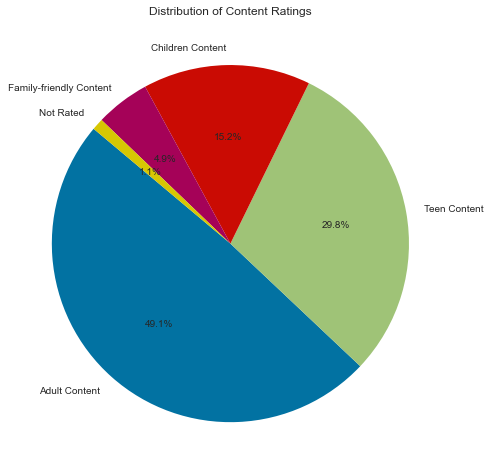

In [397]:
# Chart - 2 visualization code
rating_counts = df['rating'].value_counts()
plt.figure(figsize=(8, 12))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Content Ratings')
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart shows as a percentage of the whole here to show the distribution of ratings used pie chart.

##### 2. What is/are the insight(s) found from the chart?

The graph shows that there is more content for the adult next for the teen and so on, suggesting that the content library caters to mature and teenage audiences.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This insight can guide Netflix in focusing on its recommendations and user interfaces to attract with the predominant rating preferences of its subscribers.

#### Chart - 3 Checking Distribution of Release Year

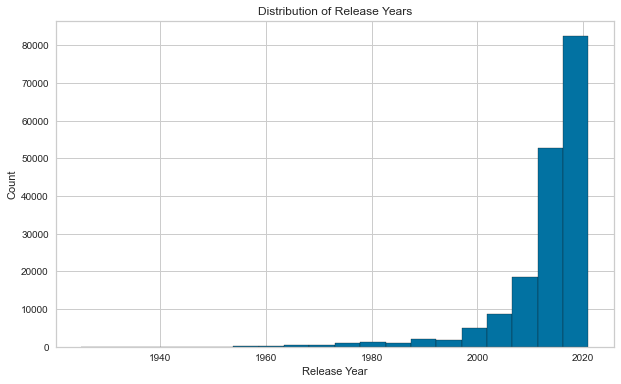

In [398]:
# Chart - 3 visualization code
plt.figure(figsize=(10, 6))
plt.hist(df['release_year'], bins=20, edgecolor='k')
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

 A histogram mostly used to show the continiouse values so, here appropriate to visualize the distribution of content releases over different years.

##### 2. What is/are the insight(s) found from the chart?

The graph shows that the content has expanded rapidly in recent years, indicating a trend of increased production.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This observation can guide Netflix in deciding resources for acquiring new content and possibly reevaluating older content to maintain viewer interest.

#### Chart - 4 Checking Country wiase Distribution

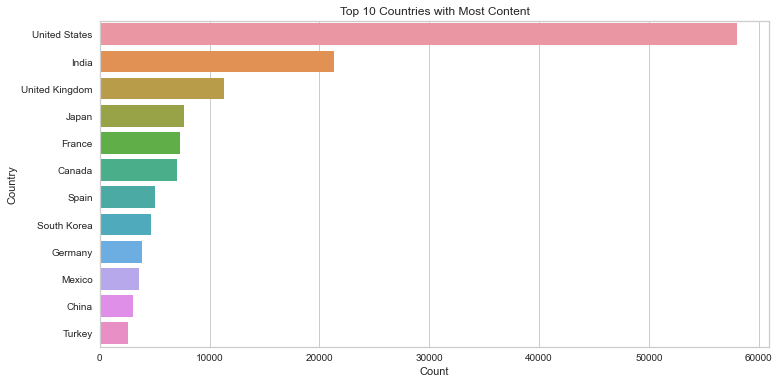

In [399]:
# Chart - 4 visualization code
top_countries = df['Country'].value_counts().head(12)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries with Most Content')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar plot because bar charts shows the count of different categories, a horizontal bar plot shows the top countries with the most content.

##### 2. What is/are the insight(s) found from the chart?

From the graph we can see that the United States has the highest contribution to the content, next is India and then United Kingdom.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Can be focuse on potentially leading to targeted marketing and localization efforts to gain to audiences in different countries.

#### Chart - 5 Checking Distribution of Duration

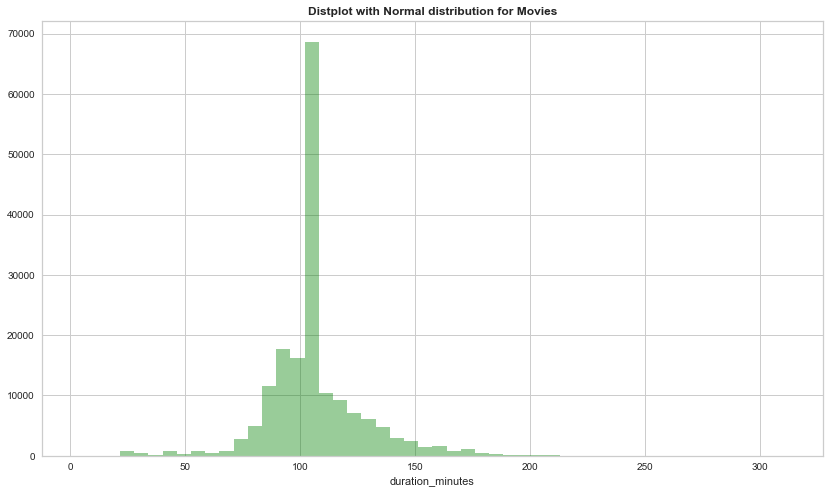

In [400]:
plt.figure(figsize=(14,8))
p= sns.distplot(df['duration_minutes'],kde=False, color=['green'])
plt.title('Distplot with Normal distribution for Movies',fontweight="bold")
for bar in p.patches:
   plots.annotate(bar.get_height(),(bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='bottom',size=7, xytext=(0, 5),
                  textcoords='offset points', rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

A histogram mostly used to check the distrubution of continiouse varibale here a histogram helps visualize the distribution of content durations.

##### 2. What is/are the insight(s) found from the chart?

Most content has durations around 1 to 2 hours, indicating a typical movie length, for 106hr has more value it can be due to filling na by mean value. 

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the distribution of content durations can assist in curating content for viewers with varying preferences for content length.

#### Chart - 6 Checking Relation between Type and Rating 

Bivariate Analysis:

Exploring the relationship between each variable and the target variables. This analysis will allow us to understand how each variable is associated with the presence or absence of these diseases. We can use techniques like bar charts to visualize the distributions of the target variables based on different categories or levels of other variables.

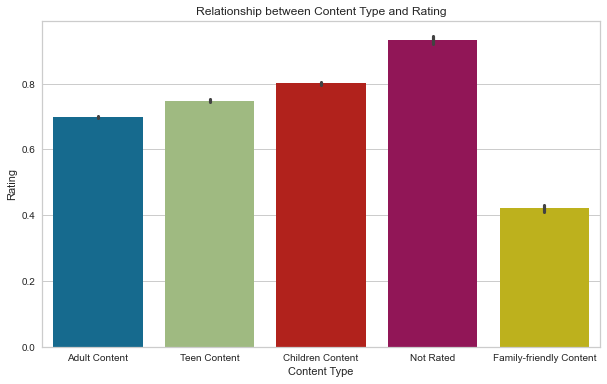

In [448]:
# Chart - 6 visualization code
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='rating', y='is_movie')
plt.title('Relationship between Content Type and Rating')
plt.xlabel('Content Type')
plt.ylabel('Rating')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar plot because bar charts shows the count of different categories here (Type and rating).

##### 2. What is/are the insight(s) found from the chart?

Family-friendly content has less rating while not rated content has more rating.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, Viewer ratings reflect their engagement with content. Higher ratings indicate content enjoyment. This data can guide creators to produce more of what's well-liked, enhancing user satisfaction and content relevance.

#### Chart - 7 To check the spread of Movies and TV Shows over Netflix

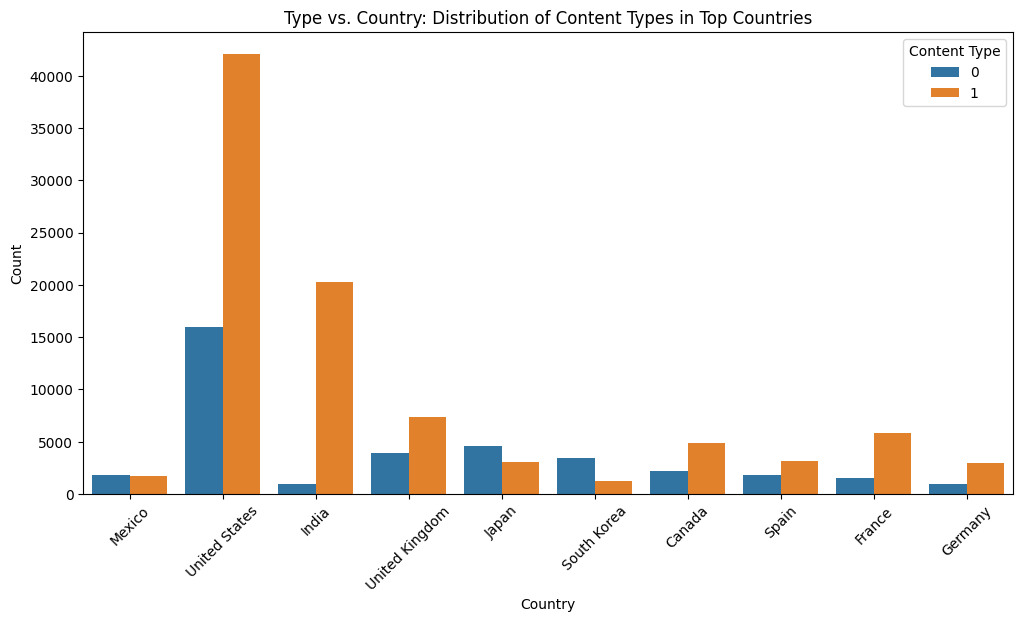

In [518]:
# Chart - 7 visualization code
top_countries = df['Country'].value_counts().head(10).index
df_top_countries = df[df['Country'].isin(top_countries)]
plt.figure(figsize=(12, 6))
sns.countplot(data=df_top_countries, x='Country', hue='is_movie')
plt.title('Type vs. Country: Distribution of Content Types in Top Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Content Type')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar plot because bar charts shows the count of different categories here, to know which country produces which type of content the most.

##### 2. What is/are the insight(s) found from the chart?

- India makes more movies than TV shows.
- Japan and South Korea focus on TV shows.
- The United States creates more movies than TV shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 The insights can help Netflix in a good way. For example, they can consider adding more Indian movies and more TV shows from Japan and South Korea to attract more viewers and grow their offerings.

#### Chart - 8 Checking Distribution of Rating in each highest content creating countries

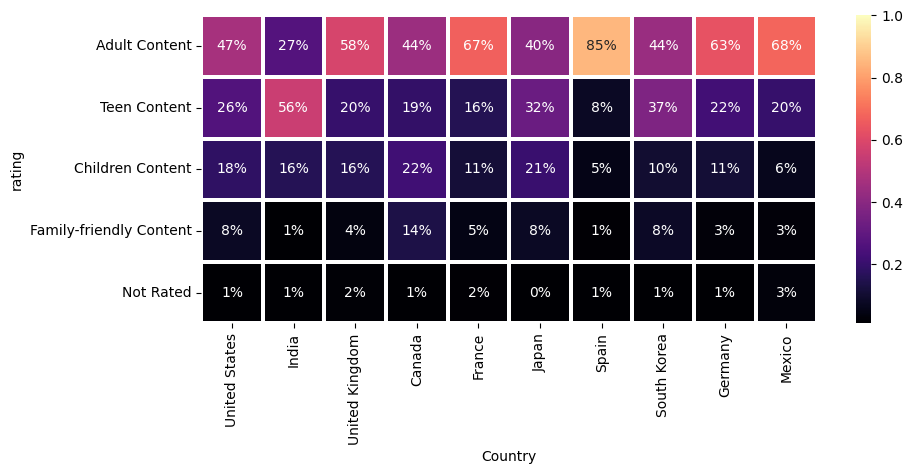

In [516]:
df['count'] = 1
Country_count = df.groupby('Country')[['Country', 'count']].sum().sort_values(by='count', ascending=False).reset_index()[:10]
Country_count = Country_count['Country']                            # Grouping country on count
heatmap = df.loc[df['Country'].isin(data)]
heatmap = pd.crosstab(heatmap['Country'], heatmap['rating'], normalize="index").T

fig, ax = plt.subplots(1, 1, figsize=(10, 4))                       # Plotting the heatmap                            

country = ['United States', 'India', 'United Kingdom', 'Canada', 'France', 'Japan', 'Spain', 'South Korea', 'Germany', 'Mexico']
rating = ['Adult Content', 'Teen Content', 'Children Content', 'Family-friendly Content', 'Not Rated'] # Defining order of representation

sns.heatmap(heatmap.loc[rating_order, country_order], cmap="magma", square=True, linewidth=1.5, cbar=True, annot=True, fmt='1.0%',vmax=1, vmin=0.01,
                        ax=ax, annot_kws={"fontsize": 10}) # Calling and plotting heatmap
plt.show()

##### 1. Why did you pick the specific chart?

This graph gives us an idea of which types of shows or movies each country is making the most.

##### 2. What is/are the insight(s) found from the chart?

- Majority of the countries focus on creating content suitable for Adult and Teen audiences.
- Notably, INDIA has a lower proportion of Adult content compared to Teen content.
- In Spain, a significant 85% of the content falls under the Adult category.
- Canada stands out for producing a larger portion of content intended for Children and Family-Friendly viewing.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Companies should tailor their content offerings to align with the preferences of specific country audiences.
- For instance, in Spain, production houses should prioritize creating more Adult content to cater to the local taste.
- In the case of Canada, focusing on producing children and Family-friendly content is recommended, as it presents opportunities for growth.

#### Chart - 9 Checking top actors performing in Movies and TV Shows

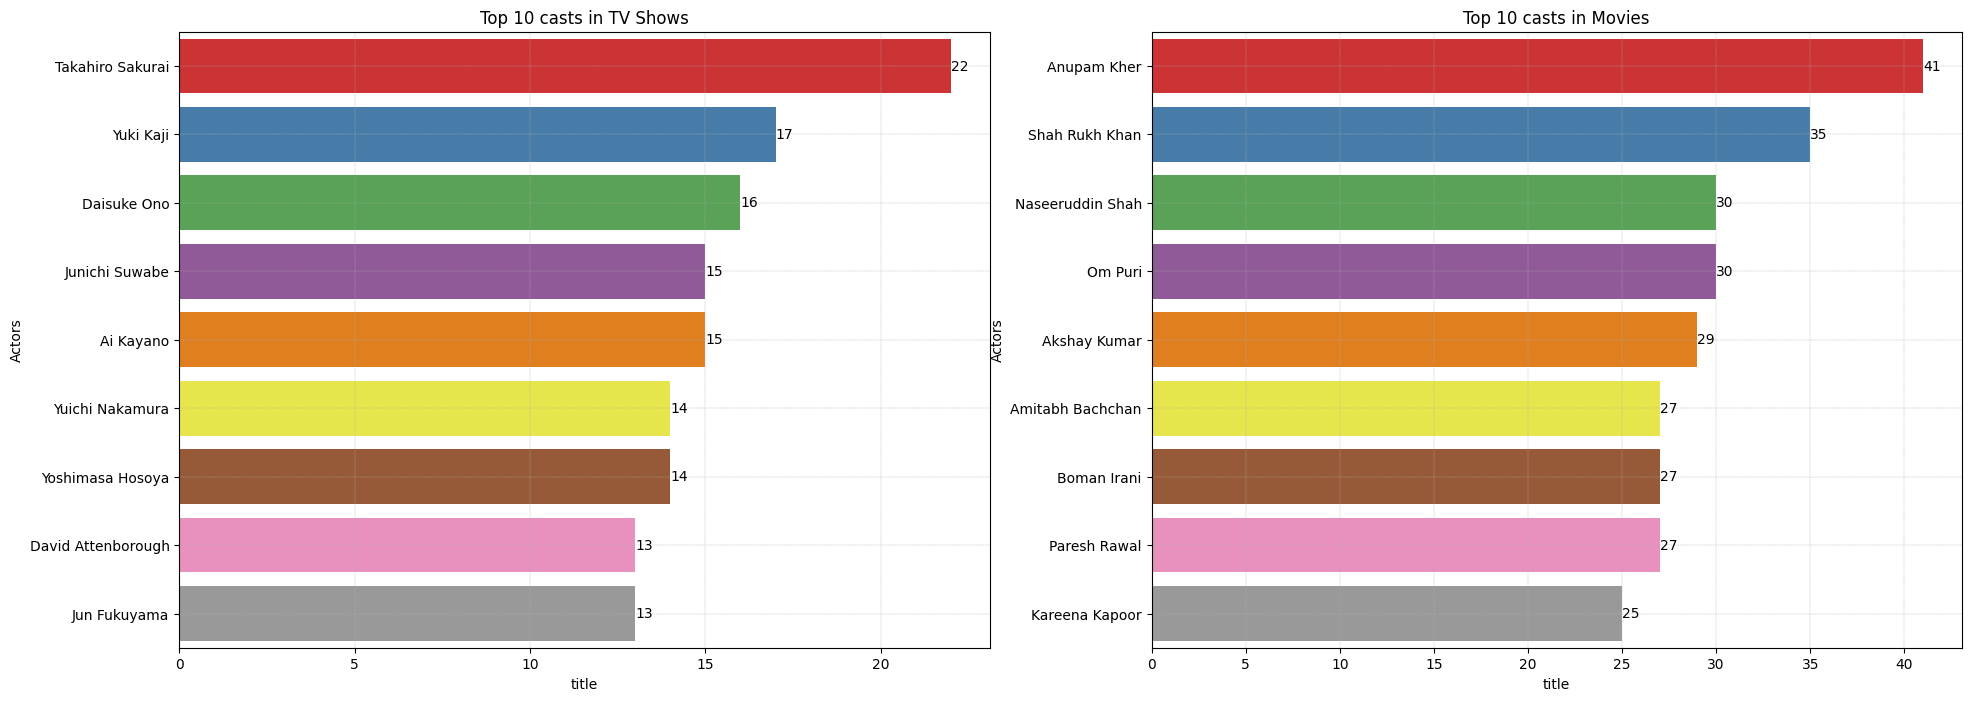

In [467]:
# Chart - 8 visualization code
plt.style.use('default')
plt.figure(figsize=(23, 8))

for content_type_flag, content_label, subplot_index in ((1, 'Movies', 1), (0, 'TV Shows', 0)):
    plt.subplot(1, 2, subplot_index + 1)
    
    content_type = df[df['is_movie'] == content_type_flag]
    df_actor = content_type.groupby(['Actors']).agg({'title': 'nunique'}).reset_index().sort_values(by=['title'], ascending=False)[1:10]
    
    plots = sns.barplot(y="Actors", x='title', data=df_actor, palette='Set1')
    plt.title(f'Top 10 casts in {content_label}')
    plt.grid(linestyle='--', linewidth=0.3)
    
    for container in plots.containers:
        plots.bar_label(container)

plt.show()


##### 1. Why did you pick the specific chart?

I chose a bar plot because bar charts shows the count of different categories here,to know which actors are more popular on Netflix.

##### 2. What is/are the insight(s) found from the chart?

- From graph we can that a majority of actors appear in Movies are from India.
- However, in TV Shows, there are no well-known actors from India.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Indians have a strong affection for movies, enjoying them wholeheartedly. As a result, businesses can focus on attracting the Indian audience for movie-related content.

#### Chart - 10 Checking top Directors of Movies and TV Shows

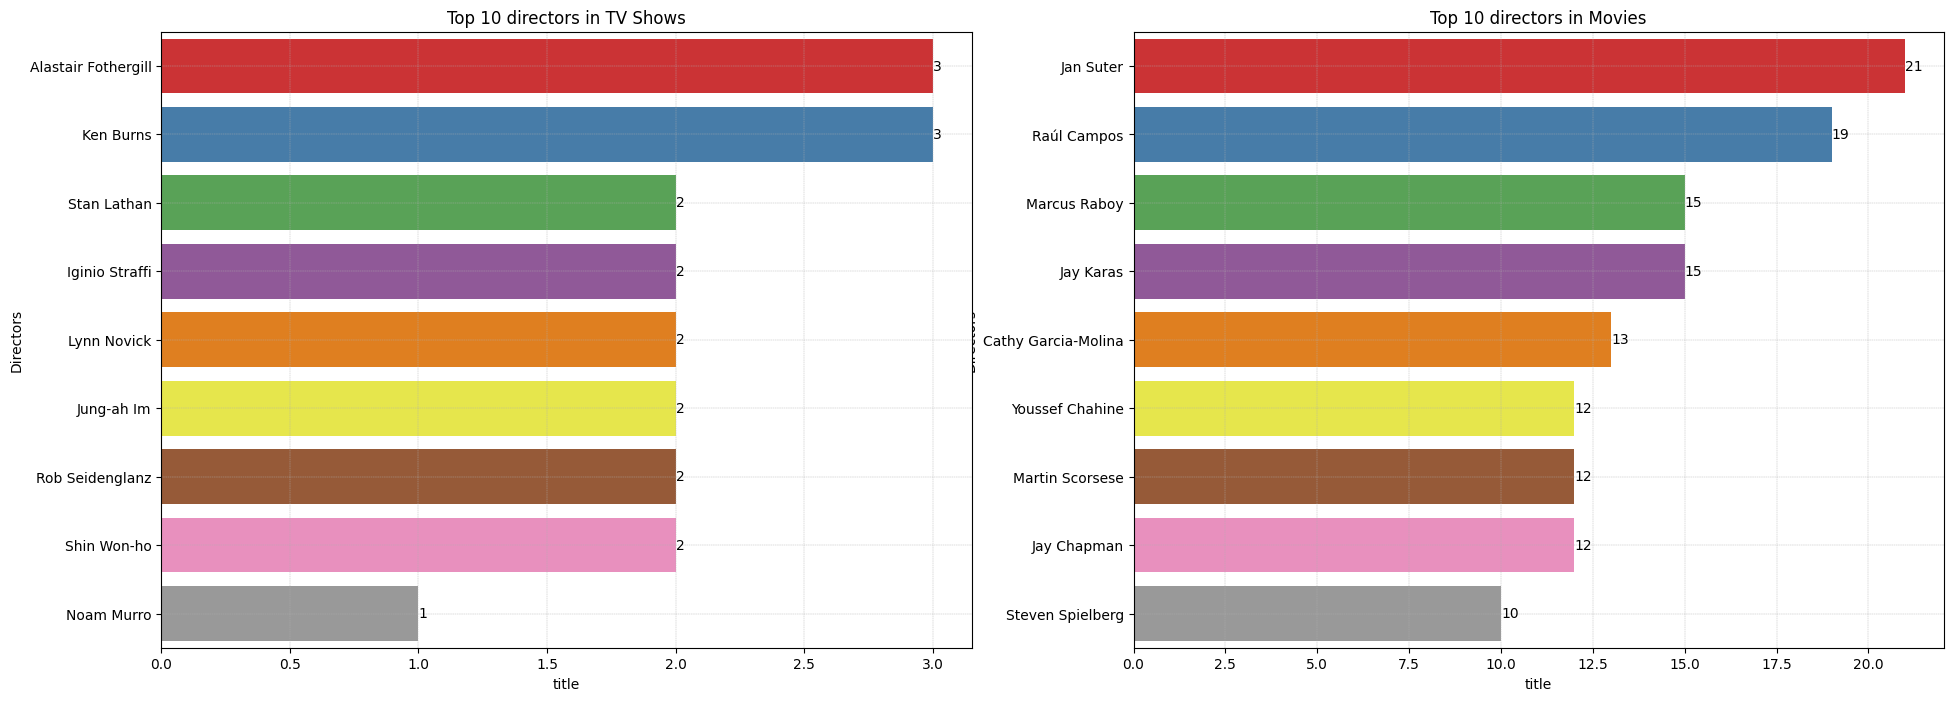

In [481]:
# Chart - 9 visualization code
plt.style.use('default')
plt.figure(figsize=(23, 8))

for content_type_flag, content_label, subplot_index in ((1, 'Movies', 1), (0, 'TV Shows', 0)):
    plt.subplot(1, 2, subplot_index + 1)
    
    content_type = df[df['is_movie'] == content_type_flag]
    df_dir = content_type.groupby(['Directors']).agg({'title': 'nunique'}).reset_index().sort_values(by=['title'], ascending=False)[1:10]
    
    plots = sns.barplot(y="Directors", x='title', data=df_dir, palette='Set1')  # Corrected column name to 'Directors'
    plt.title(f'Top 10 directors in {content_label}')
    plt.grid(linestyle='--', linewidth=0.3)
    
    for container in plots.containers:
        plots.bar_label(container)

plt.show()


##### 1. Why did you pick the specific chart?

I chose a bar plot because bar charts shows the count of different categories here, to know which director is popular in Movies and which one is popular in TV Shows.

##### 2. What is/are the insight(s) found from the chart?

- We can see that most of the movies directed by jan suter.

- Most TV shows directed by ken burns.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Movie/tvshows producers can select the popular director for their upcoming projects

#### Chart - 11 Checking top 10 Countries involved in content creation

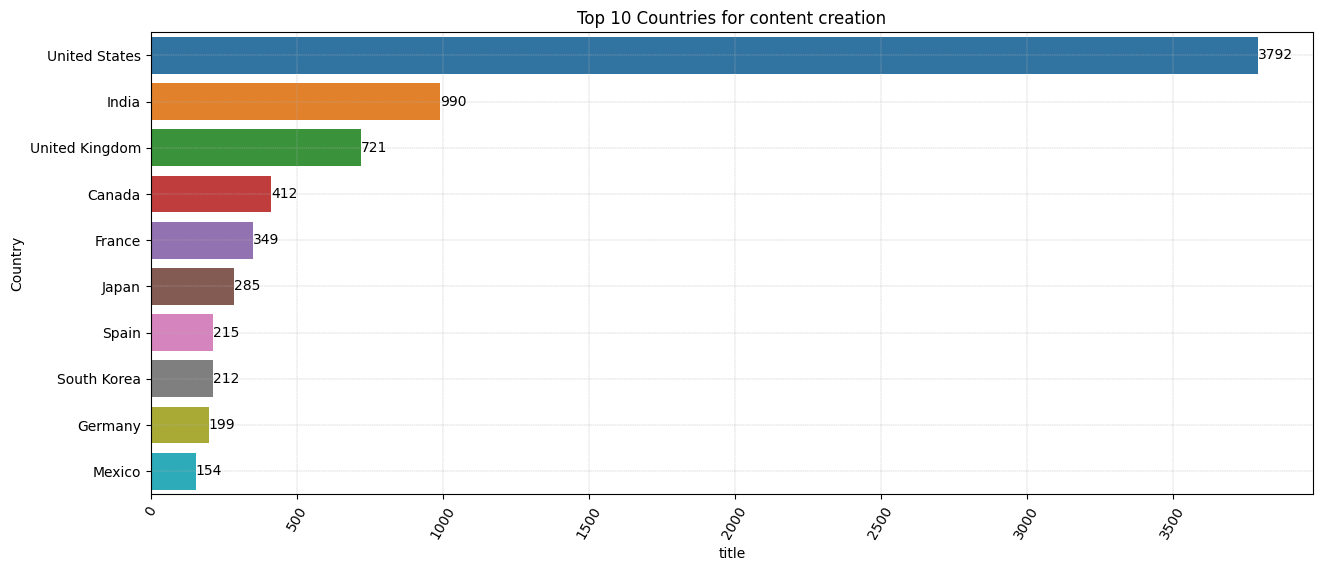

In [471]:
# Chart - 10 visualization code
df_country = df.groupby(['Country']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,6))
plots= sns.barplot(y = "Country",x = 'title', data = df_country)
plt.xticks(rotation = 60)
plt.title('Top 10 Countries for content creation')
plt.grid(linestyle='--', linewidth=0.3)
plots.bar_label(plots.containers[0])
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar plot because bar charts shows the count of different categories here, to know which country produces Maximum number of TV Shows and Movies.

##### 2. What is/are the insight(s) found from the chart?

- The United States takes the lead in producing both movies and TV shows on Netflix. This points to a strong American influence on Netflix's content.
- India stands out as the second-largest producer of movies on Netflix, underscoring the global appeal of Bollywood films.
- Countries like Canada, France, and Japan also have a notable presence in the dataset, highlighting the diversity of content available on Netflix.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can positively influence Netflix's business strategies. For instance, they can explore growth opportunities by investing in both American and Bollywood content. Additionally, the insights might encourage them to expand their content library with more diverse offerings.

#### Chart - 12 Checking Countries has the highest count of Movies and TV Shows over Netflix

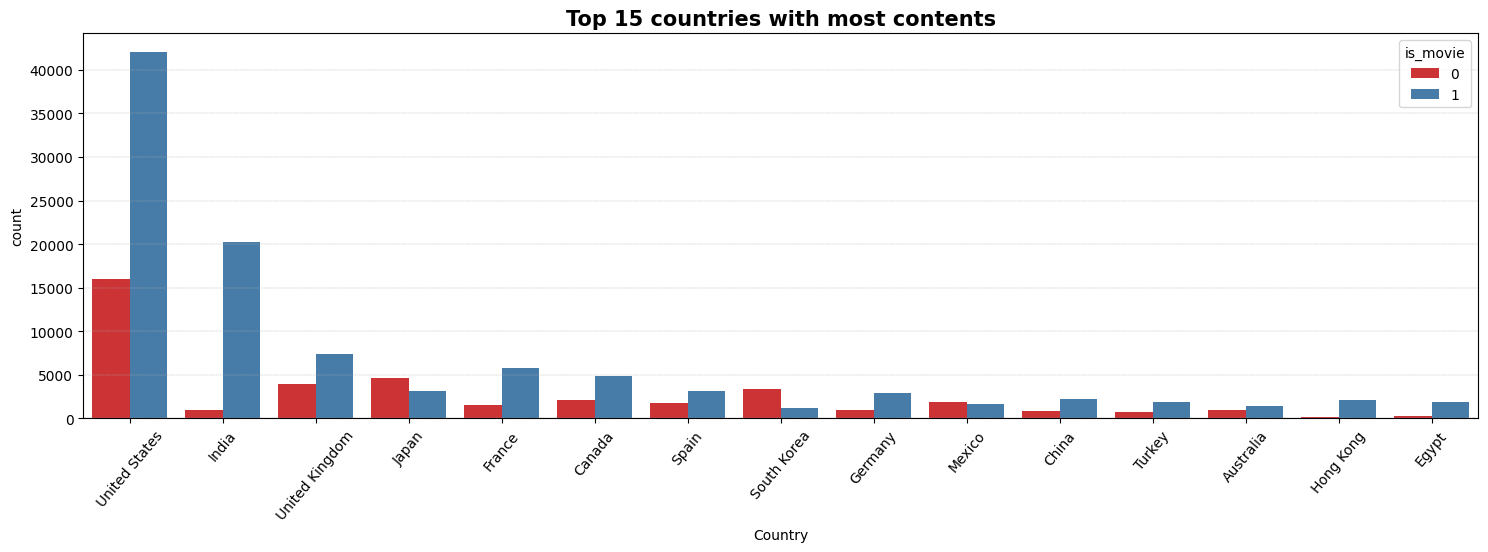

In [473]:
# Chart - 11 visualization code
plt.figure(figsize=(18,5))
plt.grid(linestyle='--', linewidth=0.3)
sns.countplot(x=df['Country'],order=df['Country'].value_counts().index[0:15],hue=df['is_movie'],palette ="Set1")
plt.xticks(rotation=50)
plt.title('Top 15 countries with most contents', fontsize=15, fontweight='bold')
plt.show()

##### 1. Why did you pick the specific chart?

A count plot is used to visualize the frequency or count of categorical data in a dataset. It's a type of bar plot that displays the number of occurrences of each unique category in a categorical variable here, to know which country produces which type of content the most.

##### 2. What is/are the insight(s) found from the chart?

- India leads in making more movies than TV shows.
- Japan and South Korea prioritize creating TV shows over movies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Absolutely, the insights can guide Netflix towards positive growth. They can seize opportunities to expand by focusing on producing additional Indian movies and Japanese/South Korean TV shows. This strategic move can resonate well with audiences and enhance their content offerings.

#### Chart - 13 Checking Genres are Popular in Netflix

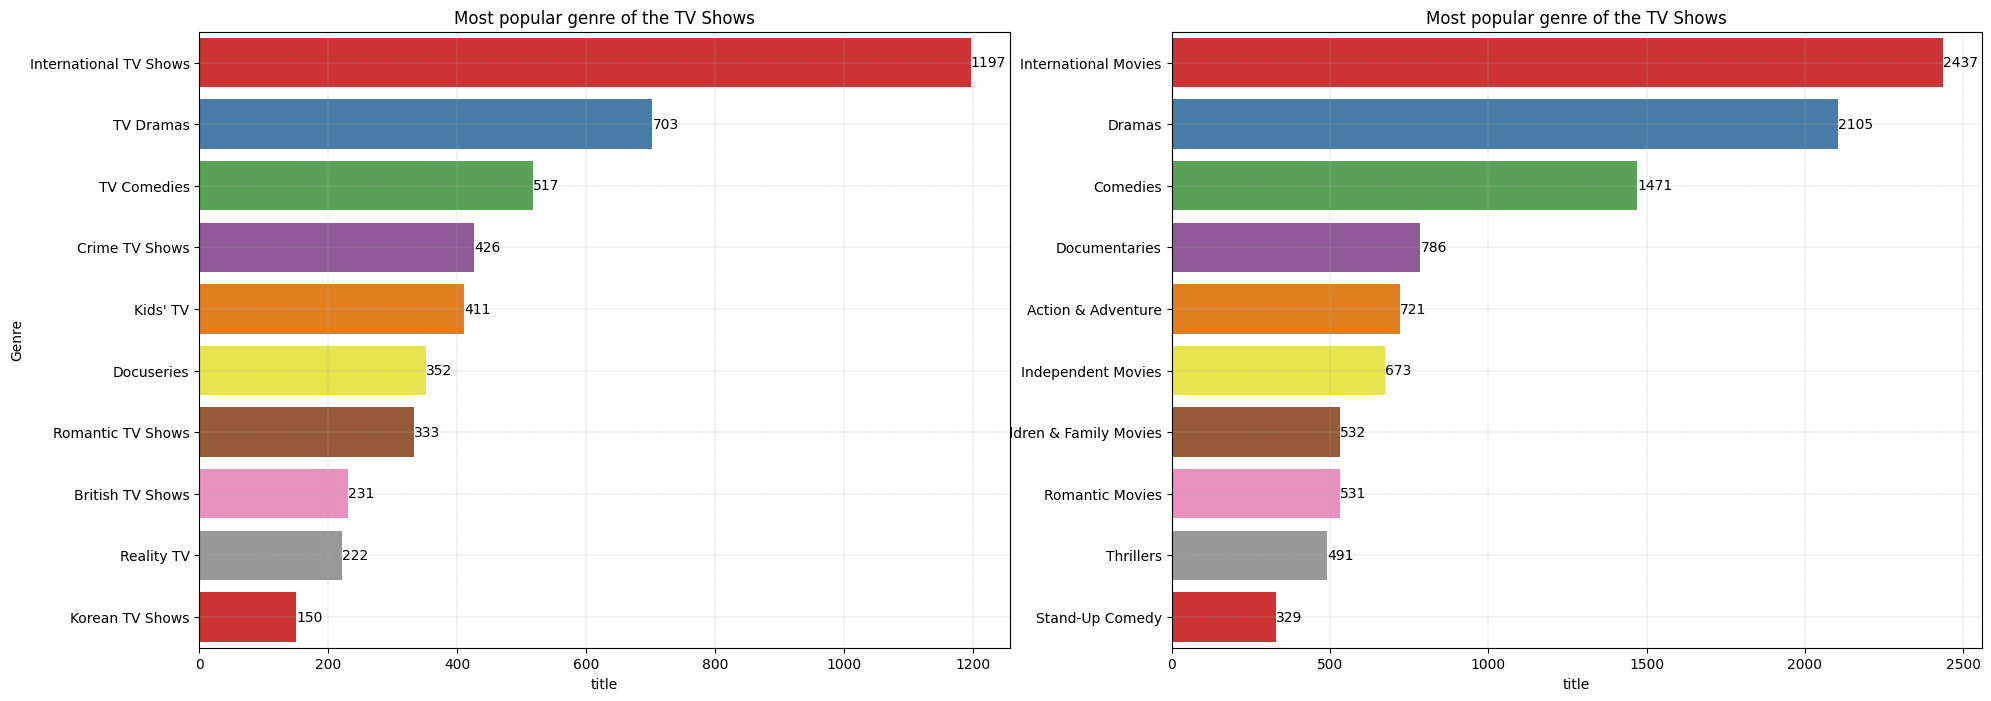

In [519]:
# Chart - 12 visualization code
plt.figure(figsize=(23,8))
for content_type_flag, content_label, subplot_index in ((1, 'Movies', 1), (0, 'TV Shows', 0)):
  plt.subplot(1, 2, subplot_index + 1)

  content_type = df[df['is_movie'] == content_type_flag]
  df_genre = content_type.groupby(['Genre']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:10]
  plots= sns.barplot(y = "Genre",x = 'title', data = df_genre, palette='Set1')
  plt.title(f'Most popular genre of the {j}')
  plt.grid(linestyle='--', linewidth=0.3)
  plots.bar_label(plots.containers[0])
  plt.yticks(rotation =0)
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar plot because bar charts shows the count of different categories here,to know which genre is most popular in Netflix.

##### 2. What is/are the insight(s) found from the chart?

International movies genre leading in popularity across both TV Shows and Movies. Following closely are the genres of Drama and Comedy.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, by knowing which genres people love, Netflix can choose and create content that viewers enjoy. This smart approach can make viewers happier and more engaged, benefiting both Netflix and its audience.

#### Chart - 14 Checking Movies/TV Shows released and added year wise on Netflix.

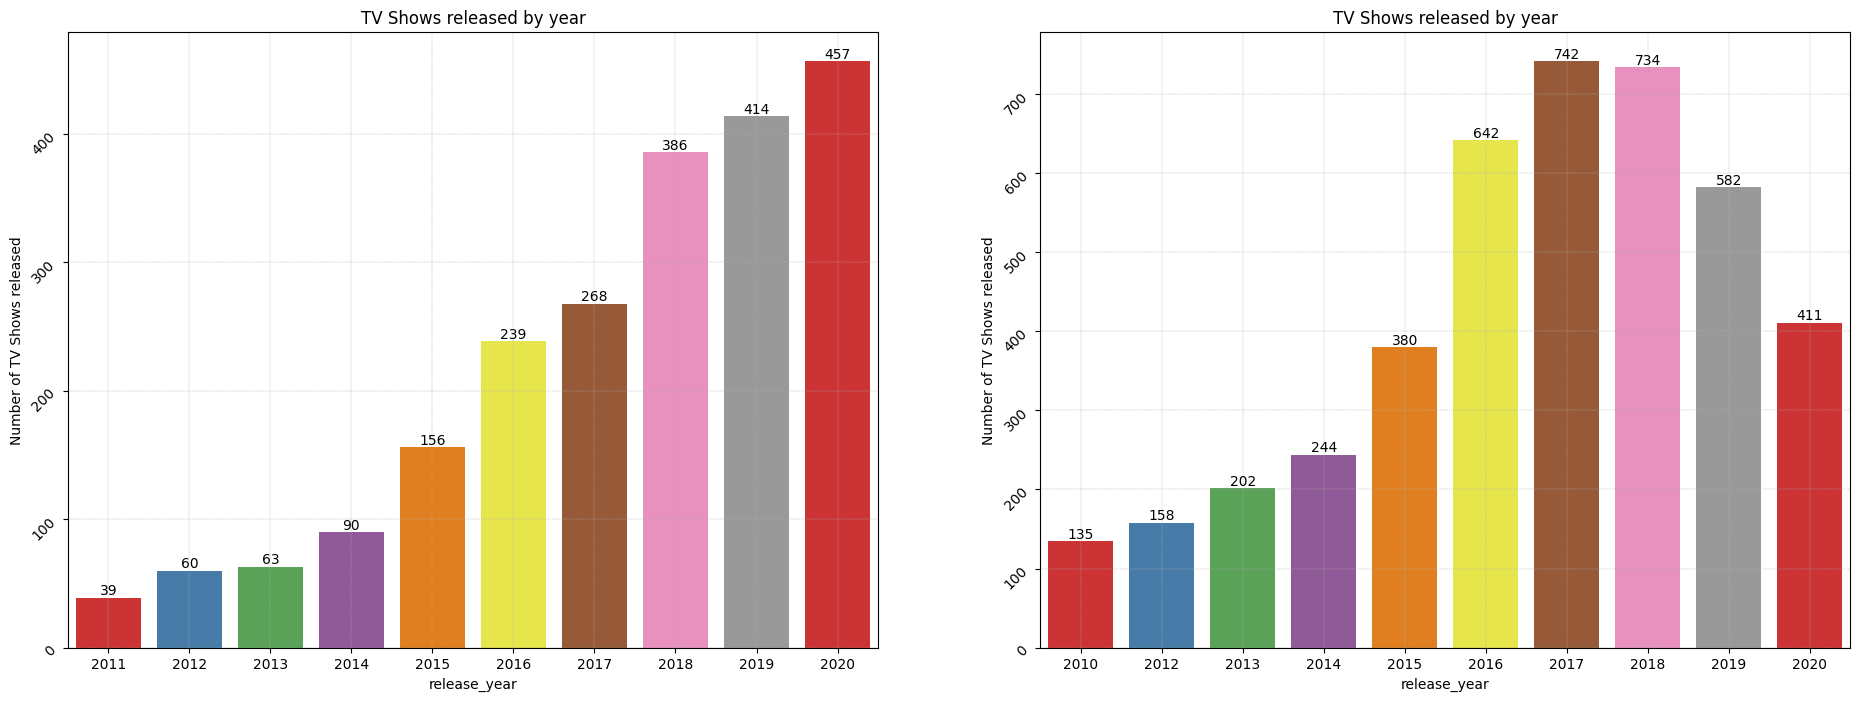

In [483]:
# Chart - 13 visualization code
plt.figure(figsize=(23,8))
for content_type_flag, content_label, subplot_index in ((1, 'Movies', 1), (0, 'TV Shows', 0)):
  plt.subplot(1, 2, subplot_index + 1)

  content_type = df[df['is_movie'] == content_type_flag]
  release_year = content_type.groupby(['release_year']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:10]
  plots= sns.barplot(x = "release_year",y = 'title', data = release_year, palette='Set1')
  plt.title(f'{j} released by year')
  plt.ylabel(f"Number of {j} released")
  plt.grid(linestyle='--', linewidth=0.3)
  plots.bar_label(plots.containers[0])
  plt.yticks(rotation = 45)
plt.show()

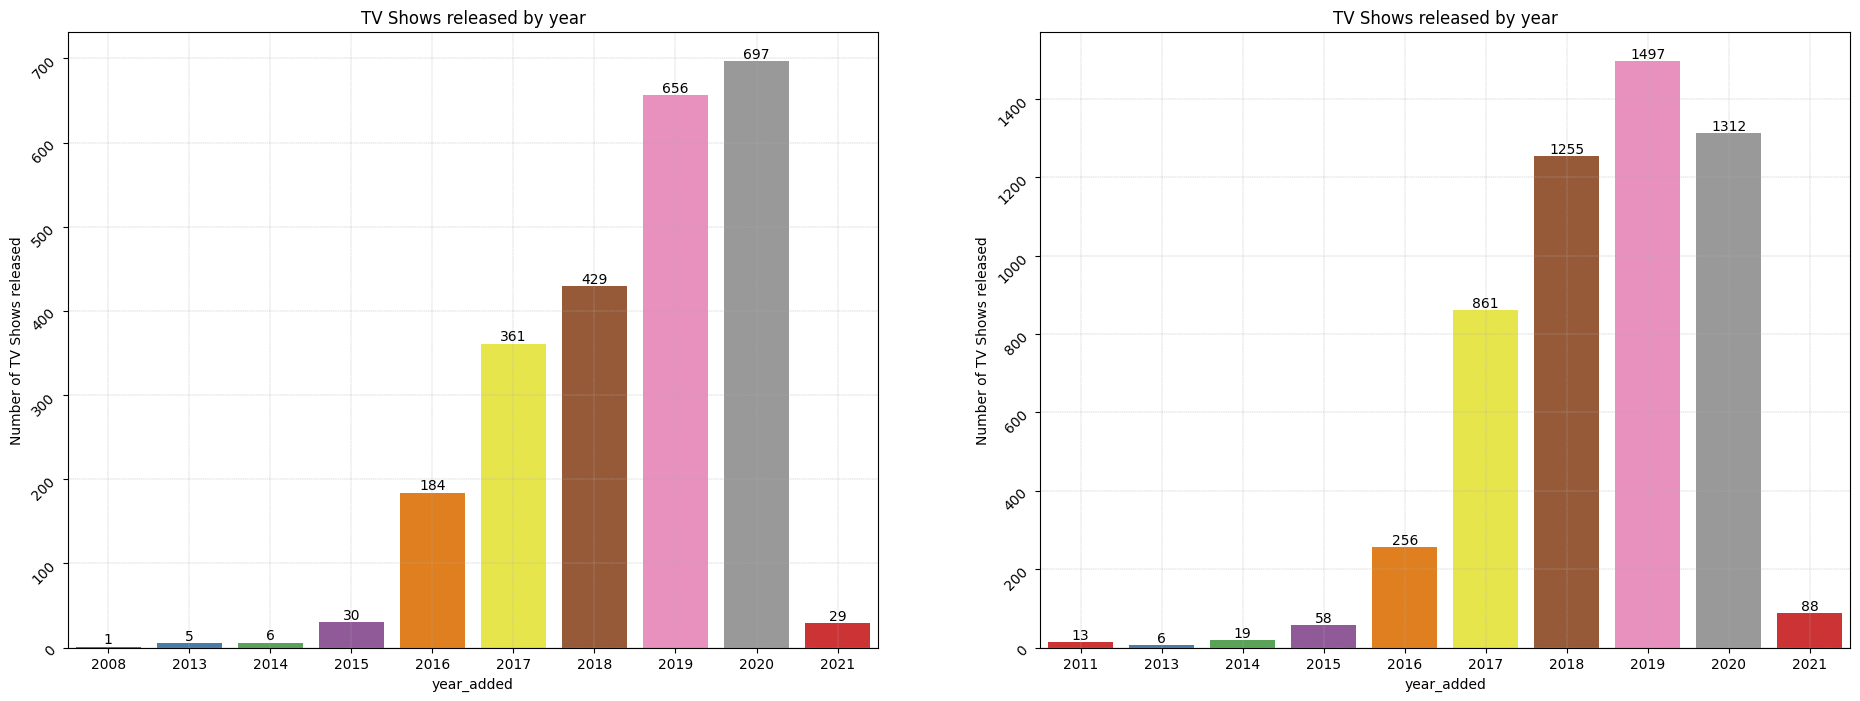

In [486]:
plt.figure(figsize=(23,8))
for content_type_flag, content_label, subplot_index in ((1, 'Movies', 1), (0, 'TV Shows', 0)):
  plt.subplot(1, 2, subplot_index + 1)

  content_type = df[df['is_movie'] == content_type_flag]
  year_added = content_type.groupby(['year_added']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:10]
  plots= sns.barplot(x = "year_added",y = 'title', data = year_added, palette='Set1')
  plt.title(f'{j} released by year')
  plt.ylabel(f"Number of {j} released")
  plt.grid(linestyle='--', linewidth=0.3)
  plots.bar_label(plots.containers[0])
  plt.yticks(rotation = 45)
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar plot because bar charts shows the count of different categories here, to see how many movies and TV Show released and added in a year on Netflix.

##### 2. What is/are the insight(s) found from the chart?

- The data reveals a consistent rise in the addition of both movies and TV shows on Netflix year by year.
- However, starting from 2018, there has been a decline in the number of newly released movies, while TV shows have seen a noticeable increase.
- In 2020 the number of added movies was notably lower compared to 2019.
- Conversely in 2020, the number of TV shows added was higher than in 2019.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The finding that movie additions have decreased while TV show additions have increased might pose challenges for Netflix's growth. This could be due to changing tastes, competition, or higher movie production costs.

To address this, Netflix could diversify content with documentaries, limited series, and comedy specials. This broadens appeal and adapts to changing trends, ensuring ongoing success.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [412]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [413]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [414]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [415]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [416]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [417]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [418]:
# Expand Contraction

#### 2. Lower Casing

In [419]:
# Lower Casing

#### 3. Removing Punctuations

In [420]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [421]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [422]:
# Remove Stopwords

In [423]:
# Remove White spaces

#### 6. Rephrase Text

In [424]:
# Rephrase Text

#### 7. Tokenization

In [425]:
# Tokenization

#### 8. Text Normalization

In [426]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [427]:
# POS Taging

#### 10. Text Vectorization

In [428]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [429]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [430]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [431]:
# Transform Your data

### 6. Data Scaling

In [432]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [433]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [434]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [435]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [436]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [437]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [438]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [439]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [440]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [441]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [442]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [443]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [444]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [445]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***